In [1]:
import numpy as np
import pandas as pd

In [2]:
# Manhattan Distance Function
def md(x1,x2):
    return np.sum(np.abs(x1-x2))

In [25]:
df = pd.read_csv("./fruit.csv")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [24]:
# Cleaning Data
df["fruit_name"] = df["fruit_name"].factorize()[0]
df["fruit_subtype"] = df["fruit_subtype"].factorize()[0]

# Splitting the Data
from sklearn.model_selection import train_test_split
X = df.drop("fruit_label",axis = 1).values
y = df["fruit_label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# KNN Logic
from collections import Counter
class KNN:
    def __init__(self,k=5):
        self.k = k

    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    
    def predict(self,X):
        pred = [self._predict(x) for x in X]
        return pred
    
    def _predict(self,x):
        # Manhattan Distances
        distances = [md(x,X_train) for X_train in self.X_train]
        # Indices
        k_nearest_indices = np.argsort(distances)[:self.k] # Finding k near indices
        k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

        co = Counter(k_nearest_labels).most_common()
        return co[0][0]



In [18]:
clf = KNN(k = 5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[3, 4, 3, 1, 4, 4, 3, 3, 3, 1, 4, 4, 3, 4, 1, 1, 4, 4]


In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.5555555555555556


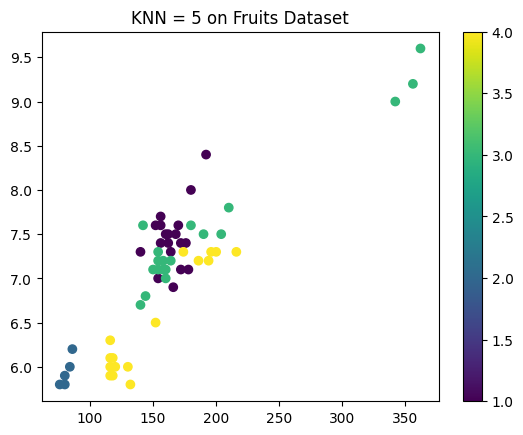

In [22]:
import matplotlib.pyplot as plt
plt.title("KNN = 5 on Fruits Dataset")
plt.scatter(X[:,2],X[:,3],c = y,cmap='viridis')
plt.colorbar()
plt.show()